<font size="+3.8">Study-by-gene heatmap/dotplot</font>  
<font size="+1.5"></font>  

Aim: Combine and plot expression from processed scRNA-seq studies. Processing see separate scripts.

In [1]:
from datetime import date
date.today().strftime('%d/%m/%Y')

'06/03/2025'

In [2]:
import os
os.getlogin()

'simonf'

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import glob
from pathlib import Path
import platform
import seaborn as sns
sc.settings.verbosity = 3

In [4]:
import utils

In [5]:
os.environ['CONDA_DEFAULT_ENV'] # conda env

'scanpy'

In [6]:
platform.platform()

'macOS-15.3.1-arm64-arm-64bit'

In [7]:
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win
main_dir='/Volumes/BD-Dichgans/SF'

In [8]:
study_order = ["OwnData", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", 
        "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"]
celltype_order = ["Astrocytes", "Microglia/Mφ", "Oligodendrocytes", "OPCs", 
        "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", 
        "Neurons", "Neuroblasts/NSCs", "Ependymal cells"]   

In [9]:
study_order_zonation = ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"]
celltype_order_zonation = ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", 
        "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", 
        "Neurons", "Neuroblasts/NSCs", "Ependymal cells"]

# Foxf2

## Excl zonation

In [13]:
gene="Foxf2"
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Foxf2_summarized'

In [14]:
# load data
df = pd.concat(
    [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
     if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
    ignore_index=True)

In [15]:
df.head()

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.001149,0.001277,Foxf2,OwnData,Mouse,783
1,Endothelial cells,1.000000,0.624260,Foxf2,OwnData,Mouse,338
2,Immune_Other,0.000000,0.000000,Foxf2,OwnData,Mouse,70
3,Microglia/Macrophages,0.001050,0.000735,Foxf2,OwnData,Mouse,1360
4,Neurons,0.001397,0.002656,Foxf2,OwnData,Mouse,753


In [16]:
df.source.unique()

array(['OwnData', 'Winkler2022', 'TabulaMuris2018', 'Vanlandewijck2018',
       'Yang2022', 'Garcia2022', 'Siletti2022', 'Zeisel2018',
       'Saunders2018'], dtype=object)

In [17]:
df_cleaned = utils.clean_and_standardize_data(df, gene, study_order, celltype_order)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


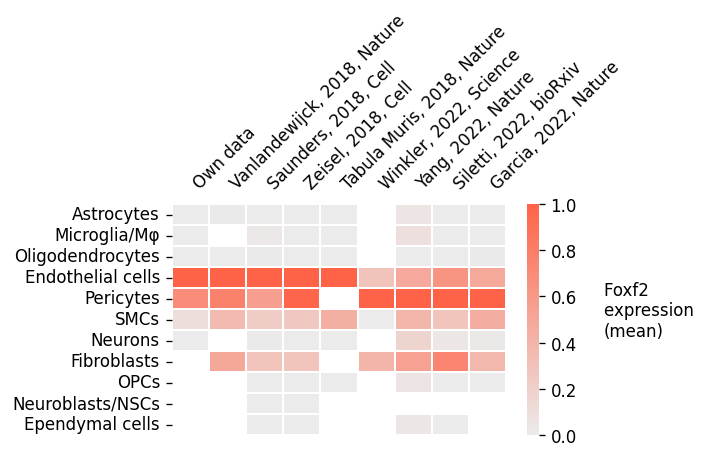

In [18]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap')
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    utils.create_heatmap(df_cleaned, gene, show=False)
    plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
    plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
    plt.show() 

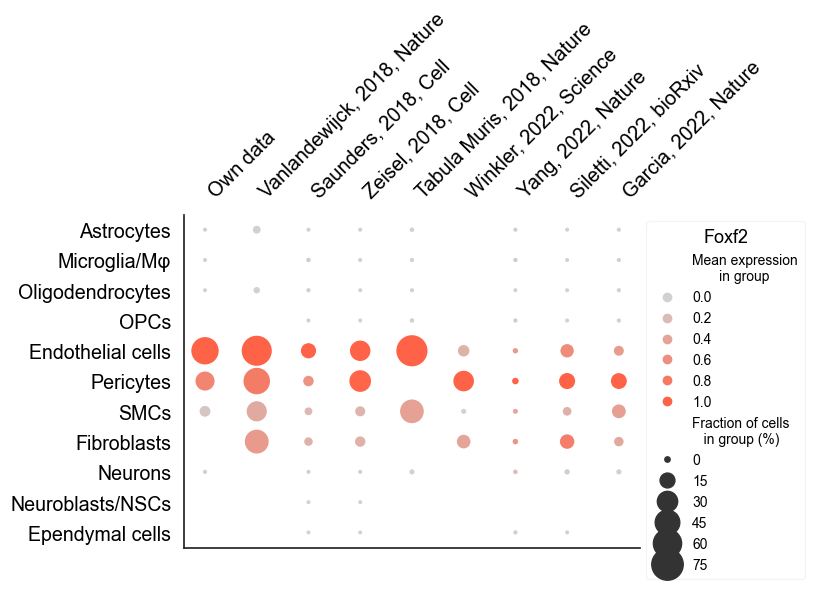

In [19]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot')
utils.create_dotplot(df_cleaned, gene, 
                     min_tile=15, # min_tile=0 shows no dot if fraction of cells is 0
                     figsize=(12, 4),
                     show=False)
plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
plt.show() 

In [20]:
utils.get_cell_numbers(df_cleaned)

source,Own data,"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,0,9943,163066,11954,257755
Microglia/Mφ,1360,0,6129,6744,4365,0,1142,91838,8164,119742
Oligodendrocytes,54,155,113209,26243,1186,0,8528,494966,29428,673769
Endothelial cells,338,1528,40105,2334,625,4950,24982,5165,6561,86588
Pericytes,92,1088,5342,4156,0,329,17561,3693,4922,37183
SMCs,95,297,7667,1575,132,41150,4669,1074,1039,57698
Neurons,753,0,399331,63512,196,0,933,2455885,23968,2944578
Fibroblasts,0,86,3993,1491,0,3721,2032,9156,4147,24626
OPCs,0,0,12252,733,202,0,1509,105734,5844,126274


## Incl zonation

In [23]:
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Foxf2_summarized' / 'incl_zonation'
cluster_key = "clusters2"

In [24]:
# load data
df = pd.concat(
    [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
     if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
    ignore_index=True
)

In [25]:
df.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Yang2022', 'Garcia2022'],
      dtype=object)

In [26]:
df_cleaned = utils.clean_and_standardize_data(df, gene, study_order_zonation, celltype_order_zonation, cluster_key=cluster_key)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


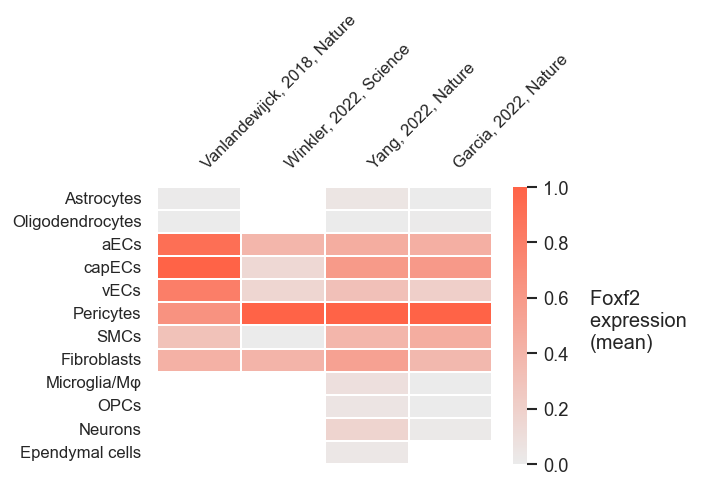

In [27]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap_incl_zonation')
with rc_context({'figure.figsize': (4.5,3), 'figure.dpi': 120}):
    utils.create_heatmap(df_cleaned, gene, cluster_key=cluster_key, show=False)
    plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
    plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
    plt.show() 

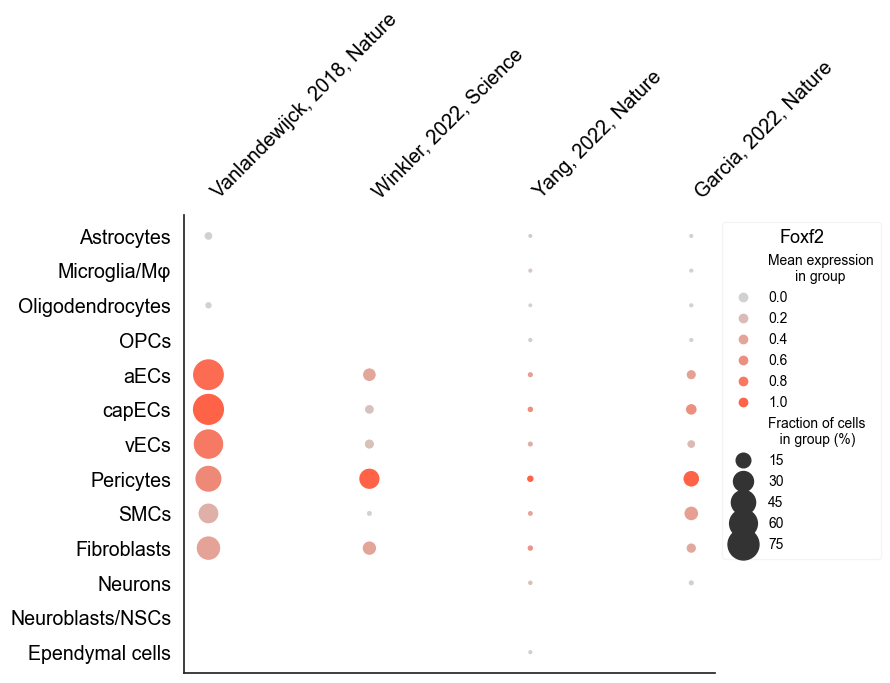

In [28]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot_incl_zonation')
utils.create_dotplot(df_cleaned, gene, 
                     min_tile=15, # min_tile=0 shows no dot if fraction of cells is 0
                     figsize=(14,5.5),
                     show=False, 
                     cluster_key=cluster_key)
plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
plt.show() 

In [29]:
utils.get_cell_numbers(df_cleaned, cluster_key=cluster_key)

source,"Vanlandewijck, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Garcia, 2022, Nature",Total
clusters2,,,,,
Astrocytes,250,0,9943,11954,22147
Oligodendrocytes,155,0,8528,29428,38111
aECs,397,2886,4486,826,8595
capECs,405,165,13357,4160,18087
vECs,298,1899,7139,1575,10911
Pericytes,1088,329,17561,4932,23910
SMCs,297,41150,4669,1029,47145
Fibroblasts,86,3721,2032,4147,9986
Microglia/Mφ,0,0,1142,8164,9306


## EDA

In [18]:
date_str = "20250306"
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Foxf2_summarized'

In [19]:
all_files = list(path.glob(f"{date_str}*.csv"))
all_files = [f for f in all_files if gene.lower() in f.stem.lower()]
#all_files
dataframes = [pd.read_csv(os.path.join(path, filename), index_col=None, header=0, sep=";") 
              for filename in all_files]
df = pd.concat(dataframes, axis=0, ignore_index=True)

In [20]:
df.source.unique()

array(['TabulaMuris2018', 'Vanlandewijck2018', 'Zeisel2018', 'OwnData',
       'Yang2022', 'Winkler2022', 'Saunders2018'], dtype=object)

In [21]:
df.gene.unique()

array(['Foxf2', 'FOXF2'], dtype=object)

In [22]:
df.clusters.value_counts()

SMCs                           7
Oligos                         6
Astrocytes                     6
Pericytes                      6
Neurons                        5
Microglia/Macrophages          5
Endothelial cells              4
Fibroblasts                    4
OPCs                           4
ECs                            3
Ependymal cells                3
Unknown                        2
Olfactory ensheathing cells    1
Neuroblasts                    1
Leptomeningeal cells           1
Immune_Other                   1
T cells                        1
Fibromyocytes                  1
Neurogenesis                   1
Name: clusters, dtype: int64

In [23]:
pd.options.display.max_columns=50
pd.crosstab(df.source, df.clusters)

clusters,Astrocytes,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,T cells,Unknown
source,,,,,,,,,,,,,,,,,,,
OwnData,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1
Saunders2018,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,1,0,0
TabulaMuris2018,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1
Vanlandewijck2018,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0
Winkler2022,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0
Yang2022,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0
Zeisel2018,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0


## Weighted mouse/human mean (not used)

In [74]:
# mean expression and fraction of cells weigthed by number of cell studies
# exploratory - not used

In [ ]:
def weighted_mean(group):
    weight_col = 'cell_number'
    weighted_mean_expr = (group['mean_expression'] * group[weight_col]).sum() / group[weight_col].sum()
    weighted_mean_frac_cells = (group['fraction_of_cells'] * group[weight_col]).sum() / group[weight_col].sum()
    total_cell_number = group[weight_col].sum()
    return pd.Series({
        'mean_expression': weighted_mean_expr,
        'fraction_of_cells': weighted_mean_frac_cells,
        'cell_number': total_cell_number
    })

In [130]:
all2_mean_own = df_cleaned[df_cleaned.source == "Own data"]
#all2_mean_own

In [131]:
all2_mean = df_cleaned[df_cleaned.source != "Own data"]

In [138]:
# Option: Exclude Yang and Saunders (as outlier studies)
all2_mean = all2_mean[all2_mean["source"] != "Yang, 2022, Nature"]
all2_mean = all2_mean[all2_mean["source"] != "Saunders, 2018, Cell"]

In [139]:
weighted_mean_df = all2_mean.groupby(['clusters', 'organism', 'gene']).apply(weighted_mean).reset_index()
weighted_mean_df = weighted_mean_df.dropna()

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\979861195.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weighted_mean_df = all2_mean.groupby(['clusters', 'organism', 'gene']).apply(weighted_mean).reset_index()
C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\979861195.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_mean_df = all2_mean.groupby(['clusters', 'organism', 'gene']).apply(weighted_mean).reset_index()


In [66]:
ECs = all2_mean[all2_mean.clusters == "Endothelial cells"]
ECs = ECs[ECs.organism == "Human"]
ECs

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Endothelial cells,0.291276,0.107273,FOXF2,"Winkler, 2022, Science",Human,4950
51,Endothelial cells,0.484664,0.078342,FOXF2,"Garcia, 2022, Nature",Human,6561
41,Endothelial cells,0.638464,0.147531,FOXF2,"Siletti, 2022, bioRxiv",Human,5165
18,Endothelial cells,0.490284,0.013450,FOXF2,"Yang, 2022, Nature",Human,24982


In [67]:
EC_mouse = all2_mean[all2_mean.clusters == "Endothelial cells"]
EC_mouse = EC_mouse[EC_mouse.organism == "Mouse"]
EC_mouse

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
77,Endothelial cells,1.0,0.752618,Foxf2,"Vanlandewijck, 2018, Nature",Mouse,1528
60,Endothelial cells,1.0,0.806400,Foxf2,"Tabula Muris, 2018, Nature",Mouse,625
9,Endothelial cells,1.0,0.350471,Foxf2,"Zeisel, 2018, Cell",Mouse,2334
29,Endothelial cells,1.0,0.193268,Foxf2,"Saunders, 2018, Cell",Mouse,40105


In [68]:
PC_mouse = all2_mean[all2_mean.clusters == "Pericytes®"]
PC_mouse = PC_mouse[PC_mouse.organism == "Mouse"]
PC_mouse

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [141]:
# verify
(ECs['mean_expression'] * ECs['cell_number']).sum()/ECs['cell_number'].sum()

0.47489605386783407

In [71]:
weighted_mean_df

,clusters,organism,gene,mean_expression,fraction_of_cells,cell_number
0,Astrocytes,Human,FOXF2,0.003052,0.000492,184963.0
3,Astrocytes,Mouse,Foxf2,0.002176,0.000722,72009.0
4,Microglia/Mφ,Human,FOXF2,0.001467,0.000297,101144.0
7,Microglia/Mφ,Mouse,Foxf2,0.010867,0.002785,17238.0
8,Oligodendrocytes,Human,FOXF2,0.000459,0.000221,532922.0
11,Oligodendrocytes,Mouse,Foxf2,0.007172,0.002109,140793.0
12,OPCs,Human,FOXF2,0.001393,0.000504,113087.0
15,OPCs,Mouse,Foxf2,0.002760,0.000682,13187.0
16,Endothelial cells,Human,FOXF2,0.484124,0.051443,41658.0
19,Endothelial cells,Mouse,Foxf2,1.000000,0.229256,44592.0


In [ ]:
# Dotplot

In [146]:
#all2_mean_own

In [147]:
weighted_mean_df["source"] = "meta-analysis"
#weighted_mean_df

In [ ]:
weighted_means = pd.concat([weighted_mean_df, all2_mean_own])
weighted_means['source'] = weighted_means['source'] + "-" + weighted_means['organism']
weighted_means

In [161]:
weighted_means.cell_number.sum()

3630082.0

In [149]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
mpl.colormaps.register(mycolormap, force = True)
#plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\3242459060.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [150]:
weighted_means['fraction_of_cells'] = weighted_means['fraction_of_cells']*100

In [151]:
weighted_means.columns = ['clusters', 'organism', 'gene', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)',
       'cell_number', 'source']

In [155]:
sns.set(style="white")
pl=sns.relplot(data=weighted_means, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.7,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

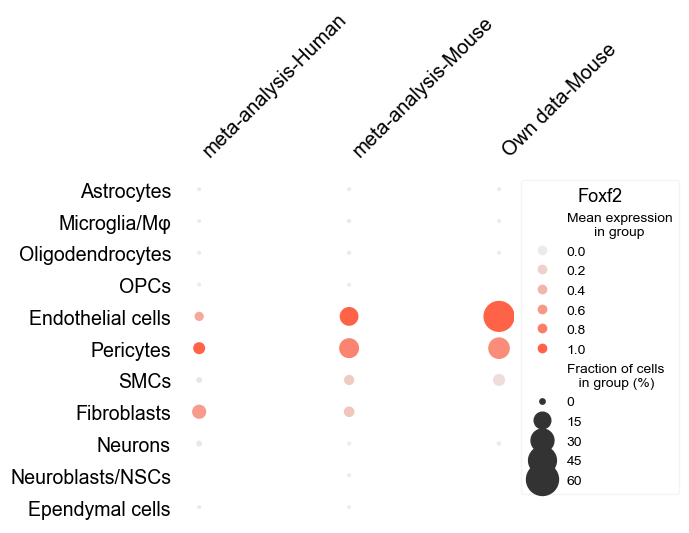

In [82]:
plt.show()

In [ ]:
pl.savefig(os.path.join(main_dir,'P06_Foxf2_per_celltype','plots',date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_weightedmean.png'), dpi=500)
pl.savefig(os.path.join(main_dir,'P06_Foxf2_per_celltype','plots',date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_weightedmean.svg'), dpi=500)

# Tek

In [30]:
gene="Tek"

## Excl zonation

In [31]:
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Other_genes_summarized'

In [32]:
# load data
df = pd.concat(
    [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
     if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
    ignore_index=True)

In [33]:
df.source.unique()

array(['OwnData', 'Winkler2022', 'TabulaMuris2018', 'Vanlandewijck2018',
       'Yang2022', 'Garcia2022', 'Siletti2022', 'Zeisel2018',
       'Saunders2018'], dtype=object)

In [34]:
df_cleaned = utils.clean_and_standardize_data(df, gene, study_order, celltype_order)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


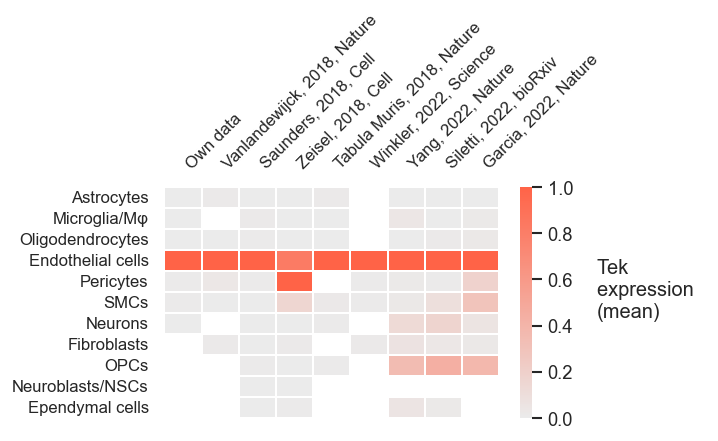

In [35]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap')
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    utils.create_heatmap(df_cleaned, gene, show=False)
    plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
    plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
    plt.show() 

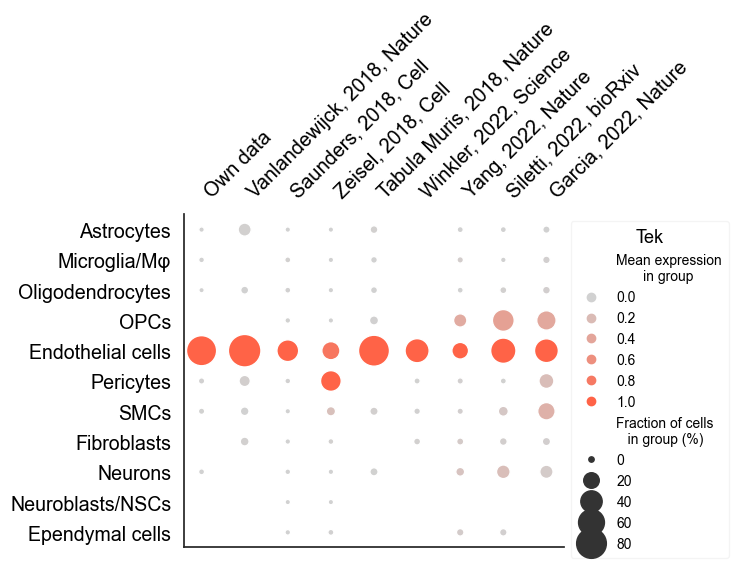

In [36]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot')
utils.create_dotplot(df_cleaned, gene, 
                     min_tile=15, # min_tile=0 shows no dot if fraction of cells is 0
                     figsize=(10, 4),
                     show=False)
plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
plt.show() 

In [37]:
utils.get_cell_numbers(df_cleaned)

source,Own data,"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,0,9943,163066,11954,257755
Microglia/Mφ,1360,0,6129,6744,4365,0,1142,91838,8164,119742
Oligodendrocytes,54,155,113209,26243,1186,0,8528,494966,29428,673769
Endothelial cells,338,1528,40105,2334,625,4950,24982,5165,6561,86588
Pericytes,92,1088,5342,4156,0,329,17561,3693,4922,37183
SMCs,95,297,7667,1575,132,41150,4669,1074,1039,57698
Neurons,753,0,399331,63512,196,0,933,2455885,23968,2944578
Fibroblasts,0,86,3993,1491,0,3721,2032,9156,4147,24626
OPCs,0,0,12252,733,202,0,1509,105734,5844,126274


## Incl zonation

In [38]:
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Other_genes_summarized' / 'incl_zonation'

In [39]:
# load data
df = pd.concat(
    [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
     if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
    ignore_index=True)

In [40]:
df.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Yang2022', 'Garcia2022'],
      dtype=object)

In [41]:
df_cleaned = utils.clean_and_standardize_data(df, gene, study_order_zonation, celltype_order_zonation, cluster_key=cluster_key)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


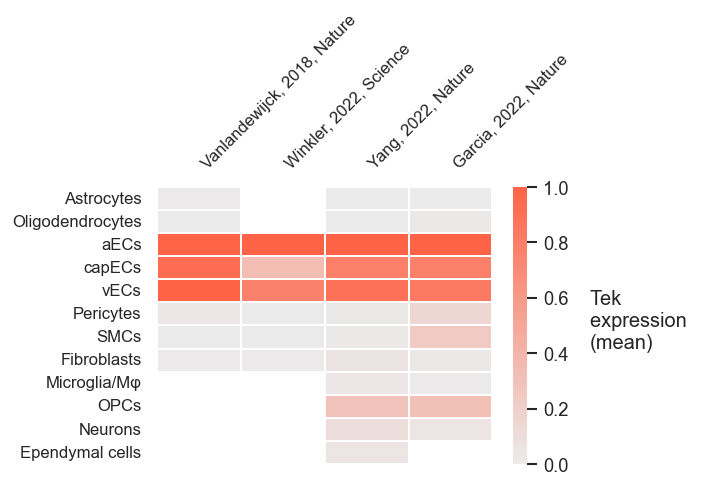

In [42]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap_incl_zonation')
with rc_context({'figure.figsize': (4.5,3), 'figure.dpi': 120}):
    utils.create_heatmap(df_cleaned, gene, cluster_key=cluster_key, show=False)
    plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
    plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
    plt.show() 

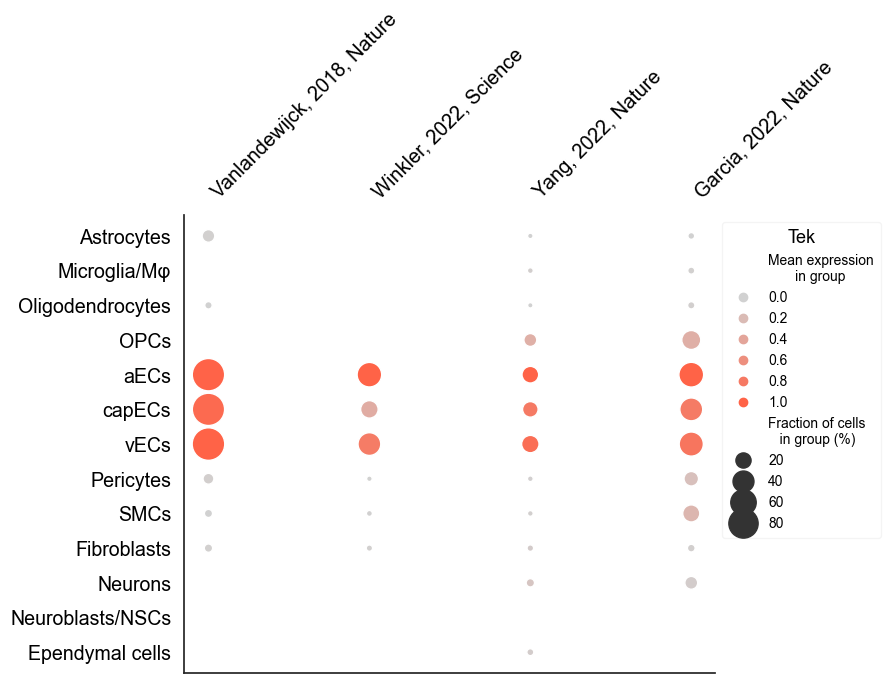

In [43]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot_incl_zonation')
utils.create_dotplot(df_cleaned, gene, 
                     min_tile=15, # min_tile=0 shows no dot if fraction of cells is 0
                     figsize=(14,5.5),
                     show=False, 
                     cluster_key=cluster_key)
plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
plt.show() 

In [44]:
utils.get_cell_numbers(df_cleaned, cluster_key=cluster_key)

source,"Vanlandewijck, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Garcia, 2022, Nature",Total
clusters2,,,,,
Astrocytes,250,0,9943,11954,22147
Oligodendrocytes,155,0,8528,29428,38111
aECs,397,2886,4486,826,8595
capECs,405,165,13357,4160,18087
vECs,298,1899,7139,1575,10911
Pericytes,1088,329,17561,4932,23910
SMCs,297,41150,4669,1029,47145
Fibroblasts,86,3721,2032,4147,9986
Microglia/Mφ,0,0,1142,8164,9306


# Foxo1

In [45]:
gene="Foxo1"

## Excl zonation

In [46]:
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Other_genes_summarized'

In [47]:
# load data
df = pd.concat(
    [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
     if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
    ignore_index=True)

In [48]:
df.source.unique()

array(['OwnData', 'Winkler2022', 'TabulaMuris2018', 'Vanlandewijck2018',
       'Yang2022', 'Siletti2022', 'Garcia2022', 'Zeisel2018',
       'Saunders2018'], dtype=object)

In [49]:
df_cleaned = utils.clean_and_standardize_data(df, gene, study_order, celltype_order)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


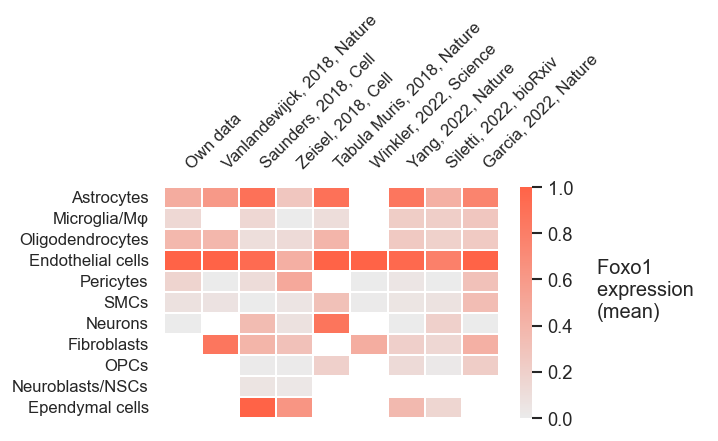

In [50]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap')
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    utils.create_heatmap(df_cleaned, gene, show=False)
    plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
    plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
    plt.show() 

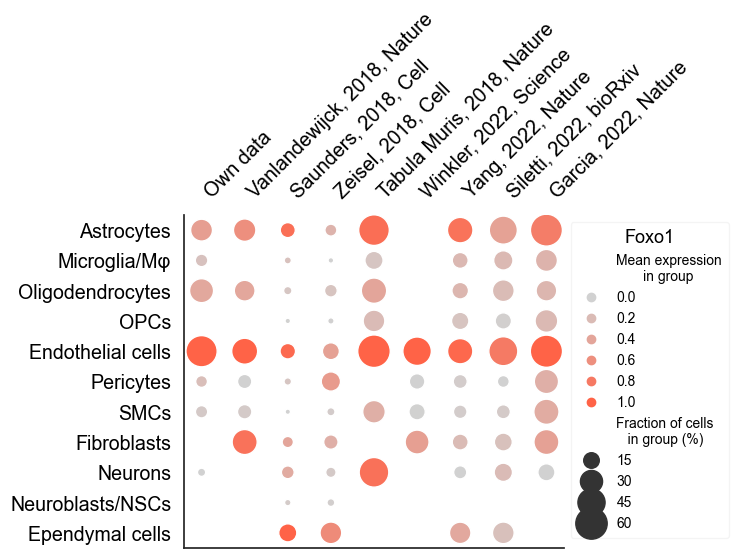

In [51]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot')
utils.create_dotplot(df_cleaned, gene, 
                     min_tile=15, # min_tile=0 shows no dot if fraction of cells is 0
                     figsize=(10, 4),
                     show=False)
plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
plt.show() 

In [52]:
utils.get_cell_numbers(df_cleaned)

source,Own data,"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,0,9943,163066,11954,257755
Microglia/Mφ,1360,0,6129,6744,4365,0,1142,91838,8164,119742
Oligodendrocytes,54,155,113209,26243,1186,0,8528,494966,29428,673769
Endothelial cells,338,1528,40105,2334,625,4950,24982,5165,6561,86588
Pericytes,92,1088,5342,4156,0,329,17561,3693,4922,37183
SMCs,95,297,7667,1575,132,41150,4669,1074,1039,57698
Neurons,753,0,399331,63512,196,0,933,2455885,23968,2944578
Fibroblasts,0,86,3993,1491,0,3721,2032,9156,4147,24626
OPCs,0,0,12252,733,202,0,1509,105734,5844,126274


## Incl zonation

In [53]:
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Other_genes_summarized' / 'incl_zonation'
cluster_key = "clusters2"

In [54]:
# load data
df = pd.concat(
    [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
     if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
    ignore_index=True)

In [55]:
df.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Yang2022', 'Garcia2022'],
      dtype=object)

In [56]:
df_cleaned = utils.clean_and_standardize_data(df, gene, study_order_zonation, celltype_order_zonation, cluster_key=cluster_key)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


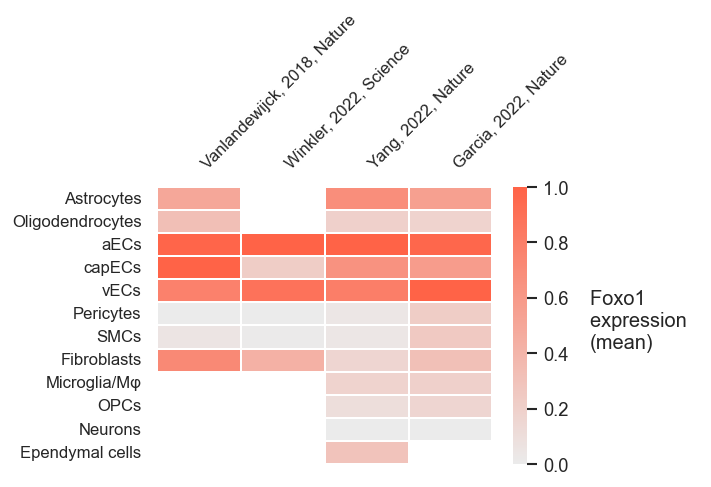

In [57]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap_incl_zonation')
with rc_context({'figure.figsize': (4.5,3), 'figure.dpi': 120}):
    utils.create_heatmap(df_cleaned, gene, cluster_key=cluster_key, show=False)
    plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
    plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
    plt.show() 

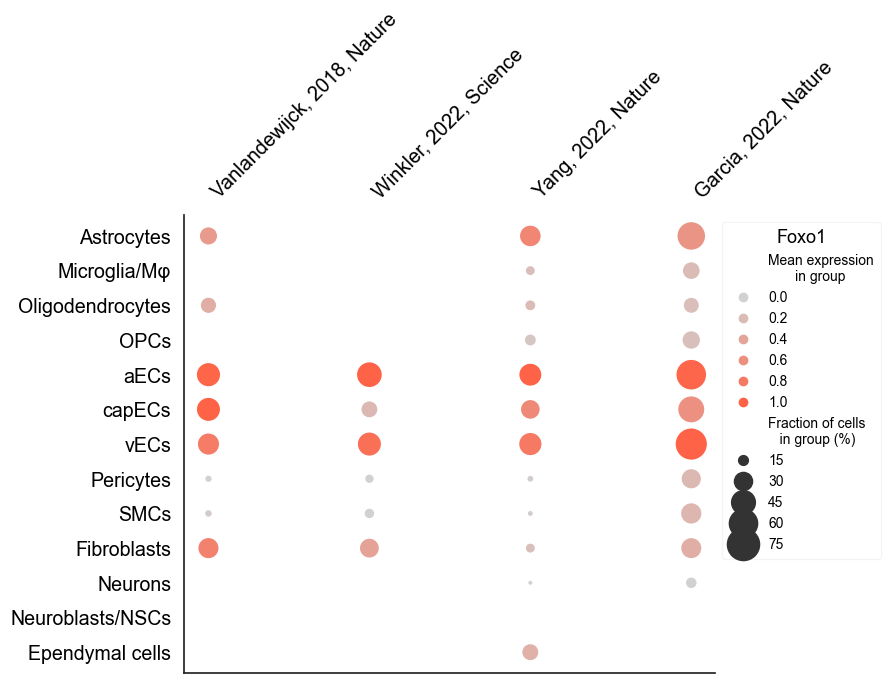

In [58]:
out_path_heat = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots', 
                             f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot_incl_zonation')
utils.create_dotplot(df_cleaned, gene, 
                     min_tile=15, # min_tile=0 shows no dot if fraction of cells is 0
                     figsize=(14,5.5),
                     show=False, 
                     cluster_key=cluster_key)
plt.savefig(out_path_heat+".png", dpi=500, bbox_inches='tight')
plt.savefig(out_path_heat+".svg", dpi=500, bbox_inches='tight')
plt.show() 

In [59]:
utils.get_cell_numbers(df_cleaned, cluster_key=cluster_key)

source,"Vanlandewijck, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Garcia, 2022, Nature",Total
clusters2,,,,,
Astrocytes,250,0,9943,11954,22147
Oligodendrocytes,155,0,8528,29428,38111
aECs,397,2886,4486,826,8595
capECs,405,165,13357,4160,18087
vECs,298,1899,7139,1575,10911
Pericytes,1088,329,17561,4932,23910
SMCs,297,41150,4669,1029,47145
Fibroblasts,86,3721,2032,4147,9986
Microglia/Mφ,0,0,1142,8164,9306


# Other genes

In [60]:
target_genes = ["Nos3", "Htra1", "Egfl8", "Flt1", "Kdr", "Ptprb", "Nrp1", "Nrp2", "Efnb2", "Itgb1", "Itga6", "Angpt2", "Cdh5", "Cldn5", "Ocln", "Ctnnb1"]

## Excl zonation

In [61]:
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Other_genes_summarized'

In [62]:
for gene in target_genes:
    print(f"Processing {gene}...")    
    
    df = pd.concat(
        [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
         if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
        ignore_index=True)
    
    # Process data
    df_cleaned = utils.clean_and_standardize_data(df, gene, study_order, celltype_order)
    
    # Heatmap
    plot_dir = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots')
    with rc_context({'figure.figsize': (5.5, 2.5), 'figure.dpi': 120}):
        utils.create_heatmap(df_cleaned, gene, show=False)
        for ext in [".png", ".svg"]:
            out_path = os.path.join(plot_dir, f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap{ext}')
            plt.savefig(out_path, dpi=500, bbox_inches='tight')
        plt.close()
    
    # Dotplot
    utils.create_dotplot(df_cleaned, gene, min_tile=15, figsize=(12, 4), show=False)
    for ext in [".png", ".svg"]:
        out_path = os.path.join(plot_dir, f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot{ext}')
        plt.savefig(out_path, dpi=500, bbox_inches='tight')
    plt.close()
    
    # cell numbers
    #utils.get_cell_numbers(df_cleaned)
    
    print(f"Completed processing {gene}")

Processing Nos3...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Nos3
Processing Htra1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Htra1
Processing Egfl8...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Egfl8
Processing Flt1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Flt1
Processing Kdr...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Kdr
Processing Ptprb...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Ptprb
Processing Nrp1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Nrp1
Processing Nrp2...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Nrp2
Processing Efnb2...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Efnb2
Processing Itgb1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Itgb1
Processing Itga6...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Itga6
Processing Angpt2...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Angpt2
Processing Cdh5...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Cdh5
Processing Cldn5...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Cldn5
Processing Ocln...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Ocln
Processing Ctnnb1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Ctnnb1


## Incl zonation

In [63]:
cluster_key = "clusters2"
date_str_list = ["20250306"]
path = Path(main_dir) / 'P06_Foxf2_per_celltype' / 'Other_genes_summarized' / 'incl_zonation'

In [64]:
for gene in target_genes:
    print(f"Processing {gene}...")
        
    df = pd.concat(
        [pd.read_csv(f, sep=";") for f in path.glob("*.csv") 
         if any(d in f.stem for d in date_str_list) and gene.lower() in f.stem.lower()],
        ignore_index=True)
    
    # Process data
    df_cleaned = utils.clean_and_standardize_data(df, gene, study_order_zonation, celltype_order_zonation, cluster_key=cluster_key)
    
    # Heatmap
    plot_dir = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'plots')
    with rc_context({'figure.figsize': (4.5, 3), 'figure.dpi': 120}):
        utils.create_heatmap(df_cleaned, gene, cluster_key=cluster_key, show=False)
        for ext in [".png", ".svg"]:
            out_path = os.path.join(plot_dir, f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_heatmap_incl_zonation{ext}')
            plt.savefig(out_path, dpi=500, bbox_inches='tight')
        plt.close()
    
    # Dotplot
    utils.create_dotplot(df_cleaned, gene, min_tile=15, cluster_key=cluster_key, figsize=(14, 5.5), show=False)
    for ext in [".png", ".svg"]:
        out_path = os.path.join(plot_dir, f'{date.today().strftime("%Y%m%d")}_{gene}_study_by_celltype_dotplot_incl_zonation{ext}')
        plt.savefig(out_path, dpi=500, bbox_inches='tight')
    plt.close()
    
    # cell numbers
    #utils.get_cell_numbers(df_cleaned)
    
    print(f"Completed processing {gene}")

Processing Nos3...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Nos3
Processing Htra1...
Completed processing Htra1
Processing Egfl8...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Egfl8
Processing Flt1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Flt1
Processing Kdr...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Kdr
Processing Ptprb...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Ptprb
Processing Nrp1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Nrp1
Processing Nrp2...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Nrp2
Processing Efnb2...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Efnb2
Processing Itgb1...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Itgb1
Processing Itga6...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Itga6
Processing Angpt2...
Completed processing Angpt2
Processing Cdh5...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Cdh5
Processing Cldn5...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Cldn5
Processing Ocln...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed processing Ocln
Processing Ctnnb1...
Completed processing Ctnnb1


# Session Info

In [65]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.8
-----
CoreFoundation              NA
Foundation                  NA
PIL                         9.4.0
PyObjCTools                 NA
anyio                       NA
appnope                     0.1.2
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
brotli                      NA
certifi                     2024.02.02
cffi                        1.15.1
chardet                     5.2.0
charset_normalizer          2.0.4
cloudpickle                 2.2.1
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dask                        2023.2.1
dateutil                    2.8.2
debugpy                     1.5.1
decorator        

# Outdated code

### Merge EC zonation

Outdated. Previously used to calculate weighted mean expression on ECs based on data from ECs split into zonation clusters. Now zonation clusters were merged already in anndata object, which is more accurate.

In [1466]:
# merge EC zonation as weighted mean expression 
# in Yang2022 Winkler2022 Vanlandewijck2018

In [1467]:
#Vanlandewijck2018 = all[all.source == "Vanlandewijck2018"]
#Vanlandewijck2018

In [1468]:
# rename
#Vanlandewijck2018["clusters"] = Vanlandewijck2018.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Vanlandewijck2018

In [1469]:
#Winkler2022 = all[all.source == "Winkler2022"]
#Winkler2022

In [1470]:
# rename
#Winkler2022["clusters"] = Winkler2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Winkler2022

In [1471]:
# Yang2022 = all[all.source == "Yang2022"]
# Yang2022

In [1472]:
# Yang2022["clusters"] = Yang2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
# Yang2022

In [1473]:
# remove original rows, then append new ones

In [1474]:
# all.loc[Yang2022.index[0]:Yang2022.index[-1],:] = None
# all.loc[Winkler2022.index[0]:Winkler2022.index[-1],:] = None
# all.loc[Vanlandewijck2018.index[0]:Vanlandewijck2018.index[-1],:] = None
# all = all.dropna()

In [1475]:
# compute new rows via weighted mean

In [1476]:
# wm = lambda x: np.average(x, weights=Yang2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Yang2022_weighted_mean = Yang2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Yang2022_weighted_mean=Yang2022_weighted_mean.reset_index()[Yang2022.columns]
# Yang2022_weighted_mean

Contains correct weighted mean of mean_expression and fraction_of_cell (double checked)

In [394]:
# wm = lambda x: np.average(x, weights=Vanlandewijck2018.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Vanlandewijck2018_weighted_mean = Vanlandewijck2018.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Vanlandewijck2018_weighted_mean=Vanlandewijck2018_weighted_mean.reset_index()[Vanlandewijck2018.columns]
# Vanlandewijck2018_weighted_mean

In [395]:
# wm = lambda x: np.average(x, weights=Winkler2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Winkler2022_weighted_mean = Winkler2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Winkler2022_weighted_mean=Winkler2022_weighted_mean.reset_index()[Winkler2022.columns]
# Winkler2022_weighted_mean

In [396]:
# # append to all
# all2 = pd.concat([all, Winkler2022_weighted_mean, Yang2022_weighted_mean, Vanlandewijck2018_weighted_mean], axis=0)
# all2 = all2.reset_index().drop("index",axis=1)

### Complement missing celltypes 

In [397]:
# complement missing celltypes as NA rows

In [398]:
# all_celltypes = pd.Series(all2.clusters.unique())
# for s in all2.source.unique():
#     # find cell types missing per source
#     key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters)
#     where_diff = all_celltypes.isin(key_diff)
#     missing_celltypes=all_celltypes[where_diff]
#     # append these to all2 as NA row
#     for m in missing_celltypes:
#         all2.loc[len(all2)] = [m,None,None,None,s,None,None]

# assert(len(all2) == len(all2.clusters.unique())*len(all2.source.unique()))

---
# Export HTML

In [ ]:
# Use nbconvert conda env
! cp combine_foxf2_results.ipynb HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb
! jupyter nbconvert HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb --to html_toc
! rm HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb